# Clustering in Real World
  
Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dominant colors in images
  
**Dominant colors in images**  
- All images consist of pixels
- Each pixel has three values: R, G, B
- Each value is a number between 0-255, representing the amount of its red, green and blue components.
- Pixel Color: combination of these RGB values
- Perform k-means on standardized RGB values to find cluster centers
- Uses: Identifying features in statelite images
  
---
   
1. Dominant colors in images  
In the final chapter of this course, let us try to use clustering on real world problems. In this first video, we will analyze images to determine dominant colors.
  
2. Dominant colors in images  
Any image consists of pixels, each pixel represents a dot in the image. A pixel consists of three values - each value is a number between 0-255, representing the amount of its red, green and blue components. The combination of these forms the actual color of the pixel. To find the dominant colors, we will perform k-means clustering, with its RGB components. One important use of k-means clustering on images is to segment satellite images to identify surface features.
  
3. Feature identification in satellite images  
In this satellite image, you can see the terrain of a river valley. Various colors typically belong to different features. K-means clustering can be used to cluster them into groups, which can then be identified into various surface features like water and vegetation.
  
4. Tools to find dominant colors  
There are two additional methods that you will be introduced to in this video, which are a part of the image class of `matplotlib`. The first one is the `matplotlib.image.imread()` method, which converts a JPEG image into a matrix, which contains the RGB values of each pixel. The second method is the `matplotlib.pyplot.imshow()` method which would display colors of the cluster centers once you perform k-means clustering on the RGB values.
  
- `matplotlib.image.imread()` : Convert image to pixels
- `matplotlib.pyplot.imshow()` : Display colors of cluster center
  
5. Test image  
In this video, let us perform k-means clustering on this image of the sea. Notice that there are two dominant colors in the image - a blue-green color of the sea water, and a light blue sky.
  
6. Convert image to RGB matrix  
The first step in the process is to convert the image to pixels using the `.imread()` method of the image class. Notice that the output of this function is a MxNx3 matrix, where M and N are the dimensions of the image. In this analysis, we are going to collectively look at all pixels, and their position would not matter, hence, we will just extract all RGB values and store them in their corresponding lists.
  
7. DataFrame with RGB values  
Once the lists are created, we store them in a pandas DataFrame.
  
8. Create an elbow plot  
  
9. Elbow plot  
Once we scale the RGB values of the list of pixels, we create the elbow plot to see how many dominant colors are present in the image. Notice that the elbow plot indicates two clusters, which supports our initial observation of two prominent colors in the image.  
  
10. Find dominant colors  
The cluster centers obtained are standardized RGB values. Recall that a standardized value of a variable is its actual value divided by the standard deviation. We would display the colors through the `.imshow()` method, which takes RGB values that have been scaled to the range of 0 to 1. To do so, we need to multiply the standardized values of the cluster centers with their corresponding standard deviations. We saw earlier that actual RGB values take the maximum value of 255, hence we divide it by 255 to get a scaled value in the range of 0-1.
  
11. Display dominant colors  
Once we have the colors with their RGB values, the `.imshow()` method is used to display them. Note that you need to provide the colors variable encapsulated as a list, as the `.imshow()` method expects a MxNx3 matrix to display a 2D grid of colors. By doing this, we are providing a 1xNx3 matrix, which tells imshow method to display only one row of colors, where N is the number of clusters. Here are the two dominant colors, which supports our preliminary observations.  
  
### Extract RGB values from image
**There are broadly three steps to find the dominant colors in an image:**  
- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.
  
![Alt text](../_images/batman.jpg)
  
  

In [2]:
import matplotlib.image as img


# Holding list for storing RGB values of all pixels
r = []
g = []
b = []

# Read batman image and print dimensions
batman_image = img.imread('../_images/batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in the respective list
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_g)

# Display holding list
print('''
Length of Red: {}
Length of Green: {}
Length of Blue: {}'''.format(len(r), len(g), len(b))
)

(169, 269, 3)

Length of Red: 45461
Length of Green: 45461
Length of Blue: 45461


### How many dominant colors?
  
Construct an elbow plot with the data frame. How many dominant colors are present?

In [3]:
from scipy.cluster.vq import whiten, kmeans


# Convert list into a Dataframe
batman_df = pd.DataFrame({
    'red': r,
    'blue': b,
    'green': g
})

# Scale the values for clustering
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

# Display
print(batman_df.head())

   red  blue  green  scaled_red  scaled_blue  scaled_green
0   37    27     27    0.464893     0.357715      0.357715
1   36    22     22    0.452328     0.291471      0.291471
2   48    22     22    0.603104     0.291471      0.291471
3   54    30     30    0.678492     0.397461      0.397461
4   32    17     17    0.402069     0.225228      0.225228


([<matplotlib.axis.XTick at 0x1223a2d90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

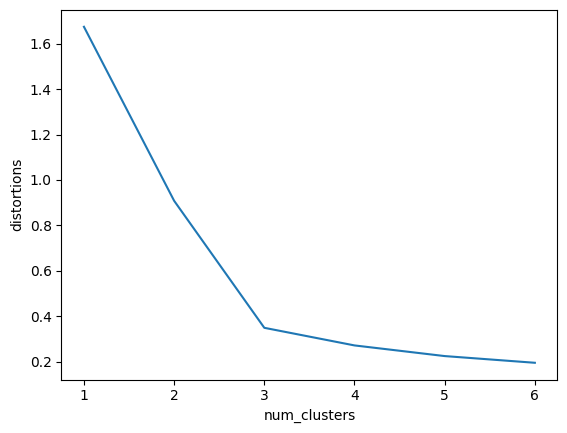

In [4]:
# Holding list for distortions and creating a range() for cluster iter
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans() function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[
        ['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a dataframe with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({
    'num_clusters': num_clusters,
    'distortions': distortions
})

# Create a line plot for the num_clusters and distortions
sns.lineplot(x= 'num_clusters', y= 'distortions', data= elbow_plot)
plt.xticks(num_clusters)

Notice that there are three distinct colors present in the image, which is supported by the elbow plot.

### Display dominant colors
  
To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula:

`converted_pixel = standardized_pixel * pixel_std / 255`

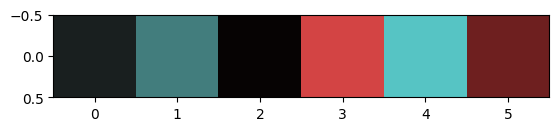

In [5]:
# Holding list for the colors of the cluster centers
colors = []

# Getting standard deviation of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

# Looping to append to the colors list
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std / 255.0,
        scaled_g * g_std / 255.0,
        scaled_b * b_std / 255.0
    ))  # .append() only takes one argument so we use a tuple

# Display colors of cluster centers
# Specify list so it does not make it (3,6) but (6,1)
plt.imshow([colors])

## Document clustering
  
**Document clustering: concepts**  
1. Clean data before processing
2. Determine the importance of the terms in a document (in tf-idf matrix)
3. Cluster the tf-idf matrix
4. Find top terms, documents in each cluster
  
**TF-IDF (Term Frequency - Inverse Document Frequency)**  
- A weighted measure: evaluate how important a word is to a document in a collection
  
**Top terms per cluster**  
- Cluster centers: lists with a size equal to the number of terms
- Each value in the cluster center is its importance
  
**More considerations**  
- Work with hyperlinks, emoticons etc.
- Normalize words (e.g. run, ran, running -> run)
- `kmeans()` in `scipy` does not work with sparse matrices
- `.todense()` may not work with large datasets
  
---
   
1. Document clustering  
In the introductory lesson, we discussed about the use of unsupervised learning techniques to group news items together by a service such as Google News. This technique, which is known as document clustering, will be explored in this video.
  
2. Document clustering: concepts  
Document clustering uses some concepts from natural language processing, or NLP. Although NLP is a huge subject, let us try and understand its basics to apply in this use case. First, we will clean the data for anything that does not add value to our analysis. Some items to remove include punctuation, emoticons and words such as "the, is, are". Next we find the TF-IDF of the terms, or a weighted statistic that describes the importance of a term in a document. Finally, we cluster the TF-IDF matrix and display the top terms in each cluster.
  
3. Clean and tokenize data  
The text in itself cannot be analyzed before converting into smaller parts called tokens, which we achieve by using NLTK's `.word_tokenize()` method. First, we remove all special characters from tokens and check if it contains to any stop words. Finally, we return the cleaned tokens. Here's the output of sample quote from the movie Pink Panther.
  
4. Document term matrix and sparse matrices  
Once relevant terms have been extracted, a matrix is formed, with the terms and documents as dimensions. An element of the matrix signifies how many times a term has occurred in each document. Most elements are zeros, hence, sparse matrices are used to store these matrices more efficiently. A sparse matrix only contains terms which have non zero elements.
  
5. TF-IDF (Term Frequency - Inverse Document Frequency)  
To find the TF-IDF of terms in a group of documents, we use the `TfidfVectorizer()` class of `sklearn` or `sklearn.feature_extraction.text.TfidfVectorizer()`. We initialize it with the following features: `max_df=` and `min_df=` signify the maximum and minimum fraction of documents a word should occur in - here we go ahead with terms that appear in more than 20% but less than 80% documents. We keep the top 50 terms using `max_features=`. Finally, we use our custom function as a `tokenizer=`. The `.fit_transform()` method creates the TF-IDF matrix for the data, which is a sparse matrix.
  
6. Clustering with sparse matrix  
`kmeans()` **in** `scipy` **does not work with sparse matrices**, so we convert the tfidf matrix to its expanded form using the `.todense()` method. kmeans can then be applied to get the cluster centers. We do not use the elbow plot, as it will take an erratic form due to the high number of variables.
  
7. Top terms per cluster  
Each cluster center is a list of tfidf weights, which signifies the importance of each term in the matrix. To find the top terms, we first create a list of all terms. Then, we create a dictionary with the terms are keys and tfidf as values. We then sort the dictionary by its values in descending order and display top terms. The `.zip()` method joins two lists in python. We analyze a list of 1000 hotel reviews to find that the top terms in one of the clusters were room, hotel, and staff, whereas the other cluster, had bad, location, and breakfast as the top terms.
  
8. More considerations  
Due to the scope of the course, we have seen a simple form of document clustering. There are more considerations when it comes to NLP. For instance, you can modify the `.remove_noise()` method to filter hyperlinks, or replace emoticons with text. You can normalize every word to its base form: for instance, run, ran and running are the forms of the same verb run. Further, the `.todense()` method may not work with large datasets, and you may need to consider an implementation of k-means that works with sparse matrices.

### TF-IDF of movie plots
  
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.  
  
Use the `TfidfVectorizer()` class to perform the TF-IDF of movie plots stored in the list plots. The `remove_noise()` function is available to use as a tokenizer in the `TfidfVectorizer()` class. The `.fit_transform()` method fits the data into the `TfidfVectorizer()` objects and then generates the TF-IDF sparse matrix.

*Note: It takes a few seconds to run the `.fit_transform()` method.*

In [6]:
# Load dataset
# Contains Title column and Plot column (paragraph string data)
movie = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/CSV/movies_plot.csv')
print(movie.head())

                       Title  \
0  The Ballad of Cable Hogue   
1        Monsters vs. Aliens   
2           The Bandit Queen   
3               Broken Arrow   
4                   Dolemite   

                                                Plot  
0  Cable Hogue is isolated in the desert, awaitin...  
1  In the far reaches of space, a planet explodes...  
2  Zarra Montalvo is the daughter of an American ...  
3  Major Vic Deakins (John Travolta) and Captain ...  
4  Dolemite is a pimp and nightclub owner who is ...  


In [7]:
# Extracting only the plots
plots = movie['Plot'].values

Punkt Sentence Tokenizer
  
`nltk.download('punkt')`  
This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.
https://www.nltk.org/api/nltk.tokenize.punkt.html

In [8]:
# pip3 install nltk
from nltk.tokenize import word_tokenize
import nltk
import re
import ssl


# Spoofing certificate, would not load.
ssl._create_default_https_context = ssl._create_unverified_context

# Loading Punkt Sentence Tokenizer
nltk.download('punkt')

# Creating a function that takes a text input and a list of stop words (default is an empty list), and returns a list of cleaned tokens.
def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)  # Keeping only the alphanumeric characters
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase and append
            cleaned_tokens.append(token.lower())
    return cleaned_tokens


# Testing the function
print(remove_noise("It is lovely weather we are having. I hope the weather continues.", ['it', 'is', 'we', 'are', 'having', 'i', 'the']))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandergursky/nltk_data...


['lovely', 'weather', 'hope', 'weather', 'continues']


[nltk_data]   Package punkt is already up-to-date!


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50, tokenizer= remove_noise)

# Use the .fit_transform() on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


You have successfully created the sparse matrix. Let us now perform clustering on the matrix.

### Top terms in movie clusters
  
Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the `.todense()` method to convert the sparse matrix, `tfidf_matrix` to a normal matrix for the `kmeans()` function to process. Then, use the `.get_feature_names_get()` method to get a list of terms in the `tfidf_vectorizer` object. The `zip()` function in Python joins two lists.  
  
With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.  
  
> `.get_feature_names_get()` or use `.vocabulary_.keys()`

**Performing K-means clustering on a document-term matrix represented by `tfidf_matrix`**
  
The variable `num_clusters` specifies the number of clusters to generate. The K-means algorithm will assign each document to one of these clusters based on its similarity to the cluster centers.  
  
The `kmeans()` function is used to generate the cluster centers, and the `distortion` variable stores the within-cluster sum of squared distances between the data points and their assigned cluster centers.  
  
The terms variable is generated from the `tfidf_vectorizer()` object, which is a `TfidfVectorizer()` object that has been fit on the text data.  
  
For each cluster, the code sorts the terms based on their importance in that cluster and prints the top 3 terms. The `dict(zip(terms, list(cluster_centers[i])))` line creates a dictionary where each term is mapped to its weight in the cluster center for that cluster, and `sorted_terms` is the list of terms sorted in descending order of their weight. The [:3] slice is used to print only the top 3 terms for each cluster.  

In [10]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = list(tfidf_vectorizer.get_feature_names_out())

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])


['him', 'they', 'who']
['her', 'she', 'him']


You will not get the same output becuase inorder to do so you would need to get a list of stopwords, the dataset is the same. It is just difficult to reproduce code without the list of stop words. However, below is what the output is in the exerceise.  
Notice positive, warm words in the first cluster and words referring to action in the second cluster.  
output:  
['father', 'back', 'one', 'tells', 'money', 'get', 'nt', 'time', 'day', 'life', 'tries', 'goes', 'also', 'school', 'gets', 'home', 'two', 'house', 'leaves', 'family', 'mother', 'go', 'night', 'new', 'first', 'take', 'later', 'however', 'finds', 'next', 'away', 'love', 'friend', 'friends', 'leave', 'decides', 'daughter', 'way', 'help', 'make', 'find', 'car', 'man', 'men', 'takes', 'film', 'young', 'police', 'killed', 'wife']
    
['police', 'man', 'killed', 'wife', 'one', 'young', 'film', 'new', 'two', 'find', 'men', 'love', 'takes', 'however', 'family', 'away', 'finds', 'way', 'later', 'take', 'home', 'goes', 'also', 'help', 'time', 'daughter', 'car', 'back', 'make', 'first', 'decides', 'get', 'father', 'tries', 'go', 'leave', 'house', 'friend', 'friends', 'gets', 'tells', 'life', 'night', 'mother', 'next', 'money', 'leaves', 'day', 'nt', 'school']  
      

## Clustering with multiple features
  
1. Clustering with multiple features  
In the final video exercise of the course, let us perform clustering on the FIFA dataset again. However, this time we will consider more than two variables and try to interpret and validate the results of clustering.
  
2. Basic checks  
While it is important to understand that all features can not be visualized and assessed at the same time when clustering with more than 3 features, we will discuss a few techniques to validate your results. This step assumes that you have created the elbow plot, performed the clustering process and generated cluster labels. First, you can check how the cluster centers vary with respect to the overall data. If you notice that cluster centers of some features do not vary significantly with respect to the overall data, perhaps, it is an indication that you can drop that feature in the next run. Next, you can also look at the sizes of the clusters formed. If one or more clusters are significantly smaller than the rest, you may want to double if their cluster centers are similar to other clusters. If the answer is yes, you may want to reduce the number of clusters in subsequent runs. In this case, you notice that the second cluster is significantly smaller. It is because we have performed clustering on three attacking attributes, for which goalkeepers have a very low value as indicated by the cluster centers. Hence, the smaller cluster is composed primarily of goalkeepers, as we will explore later.
  
3. Visualizations  
Even though all variables cannot be visualized across clusters, there are other simpler visualizations that help you understand the results of clustering. You may either visualize cluster centers or other variables stacked against each other. In `pandas`, you can use the `.plot()` method after `.groupby()` to generate such plots. In this example, the bar chart is demonstrated. You can also create a line chart to see how variables vary across clusters. In our case, you will notice that all three attributes are significantly higher in one cluster.
  
4. Top items in clusters  
Finally, let us check five players from each cluster. As expected the first cluster has top attack minded players like Ronaldo, Messi and Neymar. As explained earlier, the second cluster has top goalkeepers like Manuel Neuer, De Gea and Buffon, who have very low values for traits like volleys and heading accuracy. This determines that our clustering was appropriate.
  
5. Feature reduction  
When dealing with a large number of features, certain techniques of feature reduction may be used. Two popular tools to reduce the number of features are factor analysis and multidimensional scaling. Although these are beyond the scope of this course, you may consider them as a precursor to clustering.  
- Factor analysis
- Multidimensional scaling
  
---
  
### Basic checks on clusters
  
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

In [11]:
# Load data and display head
fifa = pd.read_csv('../_datasets/fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [12]:
# Scaling features of intrest
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

In [13]:
from scipy.cluster.vq import vq

# Creating clusters
cluster_centers, _ = kmeans(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], 3)

# Applying the datapoints to the approprate cluster
fifa['cluster_labels'], _ = vq(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], cluster_centers)

In [14]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    511
1    309
2    180
Name: ID, dtype: int64
cluster_labels
0    75170.254403
1    64051.779935
2    62377.777778
Name: eur_wage, dtype: float64


In this example, the cluster sizes are not very different, and there are no significant differences that can be seen in the wages. Further analysis is required to validate these clusters.

## FIFA 18: what makes a complete player?
  
The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 6.684385    5.427481    8.455351    8.513096    2.504167   
1                 5.444516    3.664623    7.165875    6.759972    3.967897   

                scaled_phy  
cluster_labels              
0                 8.336310  
1                 9.210371  
0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


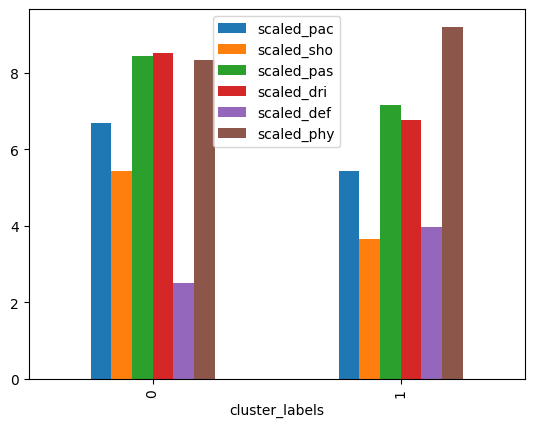

In [15]:
# Scaling additional features
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_pas'] = whiten(fifa['pas'])

# Grouping them for easier handling
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 'scaled_def', 'scaled_phy']

# Create centroids with kmeans for 2 clusters
cluster_centers, _ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

The data was sorted before you performed the clustering. Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.